# Exploratory Data Analysis (EDA) - overview 
---
* **Overview default data**
<br />Use [train.csv](../data/train.csv) to do analysis, containing $1\,458\,644$ trips.

| Name | Description | type | unit |
| :----: | :---- | :----: | :----: | 
| id | a unique identifier for each trip | object |  |
| vendor_id | a code indicating the provider associated with the trip record | int | |
| pickup_datetime | date and time when the meter was engaged | object | |
| dropoff_datetime | date and time when the meter was disengaged | object | |
| passenger_count | the number of passengers in the vehicle (driver entered value) | int | people |
| pickup_longitude | the longitude where the meter was engaged | float | degree |
| pickup_latitude | the latitude where the meter was engaged | float | degree |
| dropoff_longitude | the longitude where the meter was disengaged | float | degree | 
| dropoff_latitude | the latitude where the meter was disengaged | float | degree |
| store_and_fwd_flag | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip | object | |
| trip_duration | duration of the trip | int | second |

---
## Import modules

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import string

---
## Load & check data

In [2]:
df = pd.read_csv('../data/train.csv')
#df = pd.read_csv('../data/train_mini.scv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


---
## Overview default variables
### 1. Id
A unique identifier for each trip.

In [5]:
print len(df.id.unique())
df.__delitem__('id')

1458644


Currently, it seems not to have any special feature here. It's just a data label. So it is removed.

### 2. vendor_id
A code indicating the provider associated with the trip record.

In [6]:
types = np.sort(df.vendor_id.unique())
print 'Value types:', types

Value types: [1 2]


In [7]:
sums = df.vendor_id.value_counts()
print sums

2    780302
1    678342
Name: vendor_id, dtype: int64


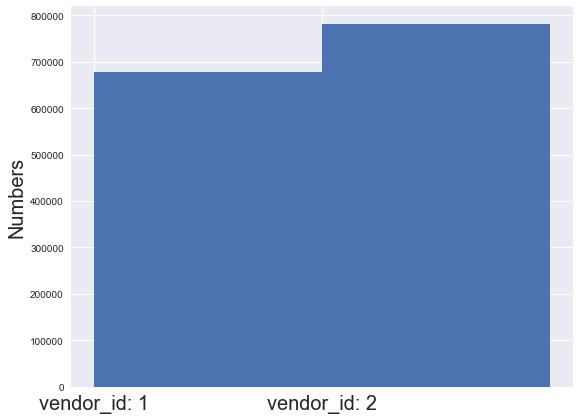

In [56]:
X = df[['vendor_id']].values

plt.figure(figsize=[9,7])
plt.hist(X, bins=range(1,4))
plt.xticks(types, ['vendor_id: '+str(i) for i in types], fontsize=20)
plt.ylabel('Numbers', size=20)
plt.show()

Only two vendor id exist in the data and with reasonable equal size.

### 3. pickup_datetime & dropoff_datetime
Date and time when the meter was **engaged** & **disengaged**<br />
**3.1. Check content type** 

In [9]:
print df['pickup_datetime'][0:5]
print 'Value type :', type(df['pickup_datetime'][0])

0    2016-03-14 17:24:55
1    2016-06-12 00:43:35
2    2016-01-19 11:35:24
3    2016-04-06 19:32:31
4    2016-03-26 13:30:55
Name: pickup_datetime, dtype: object
Value type : <type 'str'>


**3.2. Define functions for extracting datetime** 

In [10]:
import re, calendar, time, datetime

### General function for creating/adding column
def create_feature( dataframe, useColName, func, **kwds):
    return dataframe[useColName].apply(func, **kwds)
    
def add_column( dataframe, newColName, column ):
    df = dataframe.copy()
    df[newColName] = column
    return df

### Extract datetime
# Label the datetimes
datetime_list,  datetime_dict = [ 'year', 'month', 'day', 'hour', 'minute', 'second'], {}
for i, name in enumerate(datetime_list): datetime_dict[name] = i

# Split datetime by space   
def split_datetime(date_str):
    # e.g. 2016-03-26 13:30:55 -> 2016 03 26 13 30 55 
    datetime = re.sub(r'(.*)-(.*)-(.*) (.*):(.*):(.*)', r'\1 \2 \3 \4 \5 \6', date_str)
    return datetime.split()

# Get each datetime's value by label/index
def get_datetime(date_str, idx, debug=False):
    if type(idx) is str: 
        i = datetime_dict[idx]
    else:
        i = int(idx)
    if debug: 
        print 'Input %s, output %d, %s'%(str(idx), i, datetime_list[i]) 
    return int(split_datetime(date_str)[i])

# Other : Get each datetime's value
def get_year(date_str):
    return get_datetime(date_str, 'year')

def get_month(date_str):
    return get_datetime(date_str, 'month')

def get_day(date_str):
    return get_datetime(date_str, 'day')

def get_hour(date_str):
    return get_datetime(date_str, 'hour')

def get_minute(date_str):
    return get_datetime(date_str, 'minute')

def get_second(date_str):
    return get_datetime(date_str, 'second')

def get_weekday(date_str):
    return datetime.date(get_year(date_str), get_month(date_str), get_day(date_str)).isoweekday() 

def get_timestamp(date_str):
    return int(time.mktime(time.strptime(date_str, '%Y-%m-%d %H:%M:%S')))


### For cross-check
# get_datetime('2016-03-26 13:30:55', 2)
# get_datetime('2016-03-26 13:30:55', 'year')
#
#import datetime
#a = create_feature(df, 'pickup_datetime', get_timestamp )
#print a[0]
#print datetime.datetime.fromtimestamp(int(a[0]))
#print df['pickup_datetime'][0]

**3.3. Add/remove columns to/from dataframe** 

In [11]:
for situation in ['pickup', 'dropoff']:
    # Record execution time
    start_time = time.time()
    print 'Extracting '+situation+'_datetime....'
    
    # Add splitted datetime columns
    for i, name in enumerate(datetime_list):
        newcol = create_feature(df, situation+'_datetime', get_datetime, idx=i)
        df = add_column(df, situation+'_'+name, newcol)
        
    # Add weekday
    newcol = create_feature(df, situation+'_datetime', get_weekday)
    df = add_column(df, situation+'_weekday', newcol)

    # Add timestamp
    newcol = create_feature(df, situation+'_datetime', get_timestamp)
    df = add_column(df, situation+'_timestamp', newcol)
    
    print 'Done : %s sec.'% str(time.time() - start_time)

Extracting pickup_datetime....
Done : 239.26413393 sec.
Extracting dropoff_datetime....
Done : 240.458647966 sec.


In [12]:
# Remove datetime (str)
df.__delitem__('pickup_datetime')
df.__delitem__('dropoff_datetime')
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,...,pickup_weekday,pickup_timestamp,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second,dropoff_weekday,dropoff_timestamp
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,...,1,1457947495,2016,3,14,17,32,30,1,1457947950
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,...,7,1465663415,2016,6,12,0,54,38,7,1465664078
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,...,2,1453174524,2016,1,19,12,10,48,2,1453176648
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,...,3,1459942351,2016,4,6,19,39,40,3,1459942780
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,...,6,1458970255,2016,3,26,13,38,10,6,1458970690


**3.4 Check year**

In [24]:
print np.unique(df['pickup_year']), np.unique(df['dropoff_year'])

[2016] [2016]


In [25]:
# Remove year
df.__delitem__('pickup_year')
df.__delitem__('dropoff_year')
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day,...,pickup_second,pickup_weekday,pickup_timestamp,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second,dropoff_weekday,dropoff_timestamp
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,14,...,55,1,1457947495,3,14,17,32,30,1,1457947950
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,12,...,35,7,1465663415,6,12,0,54,38,7,1465664078
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,19,...,24,2,1453174524,1,19,12,10,48,2,1453176648
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,6,...,31,3,1459942351,4,6,19,39,40,3,1459942780
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,26,...,55,6,1458970255,3,26,13,38,10,6,1458970690


* Remove the year column, since they are all the same.

**3.5 Distribution of month, day, time**

In [52]:
# Working....

**3.6 Cross-Check duration v.s. timestamp**

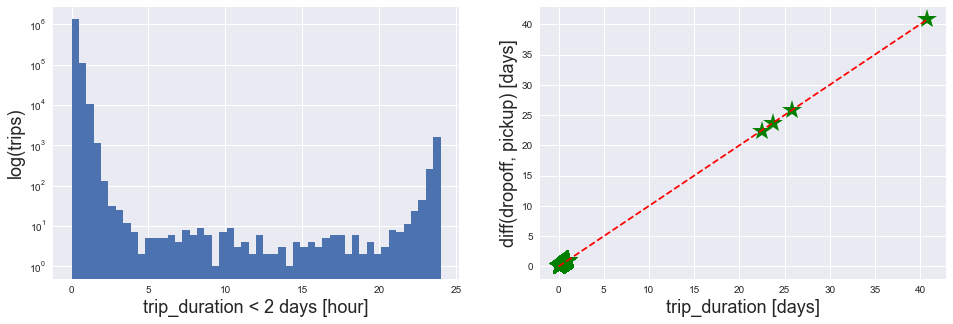

In [50]:
# Get values with array, float type
x = df['trip_duration'].values.astype(float)
y = (df['dropoff_timestamp']-df['pickup_timestamp']).values.astype(float)

x_hr, x_day, y_day = x/60/60, x/60/60/24, y/60/60/24

# Linear fit x-y
pars = np.polyfit(x_day, y_day, deg=1)
xf = np.linspace(0., max(x_day), 100)
yf = np.poly1d(pars)(xf)

# plot trip_duration distribution
day_cut = 2
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1, 2, 1)
plt.hist( x_hr[ x_hr < day_cut*24 ], bins=50, log=True)
plt.xlabel('trip_duration < %d days [hour]'%(day_cut), fontsize=18)
plt.ylabel('log(trips)', fontsize=18)

# plot fitted results
fig.add_subplot(1, 2, 2)
plt.plot( x_day, y_day, 'g*', xf, yf, 'r--', markersize=20)
plt.xlabel('trip_duration [days]', fontsize=18)
plt.ylabel('diff(dropoff, pickup) [days]', fontsize=18)
plt.show()

In [59]:
print 'Linear fit y = x*%.2f + %.2f '%( pars[0], pars[1])
print '[NOTE] %d trips are out of %d days'%( len(x[ x > day_cut*24*60*60 ]), day_cut )
print df.loc[df['trip_duration'] > day_cut*24*60*60 ]['trip_duration']

Linear fit y = x*1.00 + -0.00 
[NOTE] 4 trips are out of 2 days
355003    1939736
680594    2049578
924150    2227612
978383    3526282
Name: trip_duration, dtype: int64


* The duration in data is correct by comapring with timestamps between pickup & dropoff. The **fitted slope = 1**, **intercept = 0**. 
* There are **4 trips** having strange long duration. Need to check the distance v.s. duration, it can show if the duration in reasonable distance. Or the time clock was fogetten to closed. 

In [53]:
# Working....